# Importing Libraries

In [21]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import plotly as pt

# Loading Data

In [16]:
df = pd.read_csv('data.csv')

In [17]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Observing data and cleaning data

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3) Unnamed: 32


Ten real-valued features are computed for each cell nucleus:

1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry
10) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [18]:
len(df)

569

In [19]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We notice above that all other features do not contain Null values except for Unnamed: 32, which contains only null values, so I believe it would make more sense to remove the feature as it does not contribute to detecting if the breast cancer is malignant or benign. ID does not contribute either, so we will be removing it as well. 

In [20]:
df = df.drop(columns=['Unnamed: 32', 'id'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
X = df.iloc[:, 1:]
y = df['diagnosis']

In [23]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

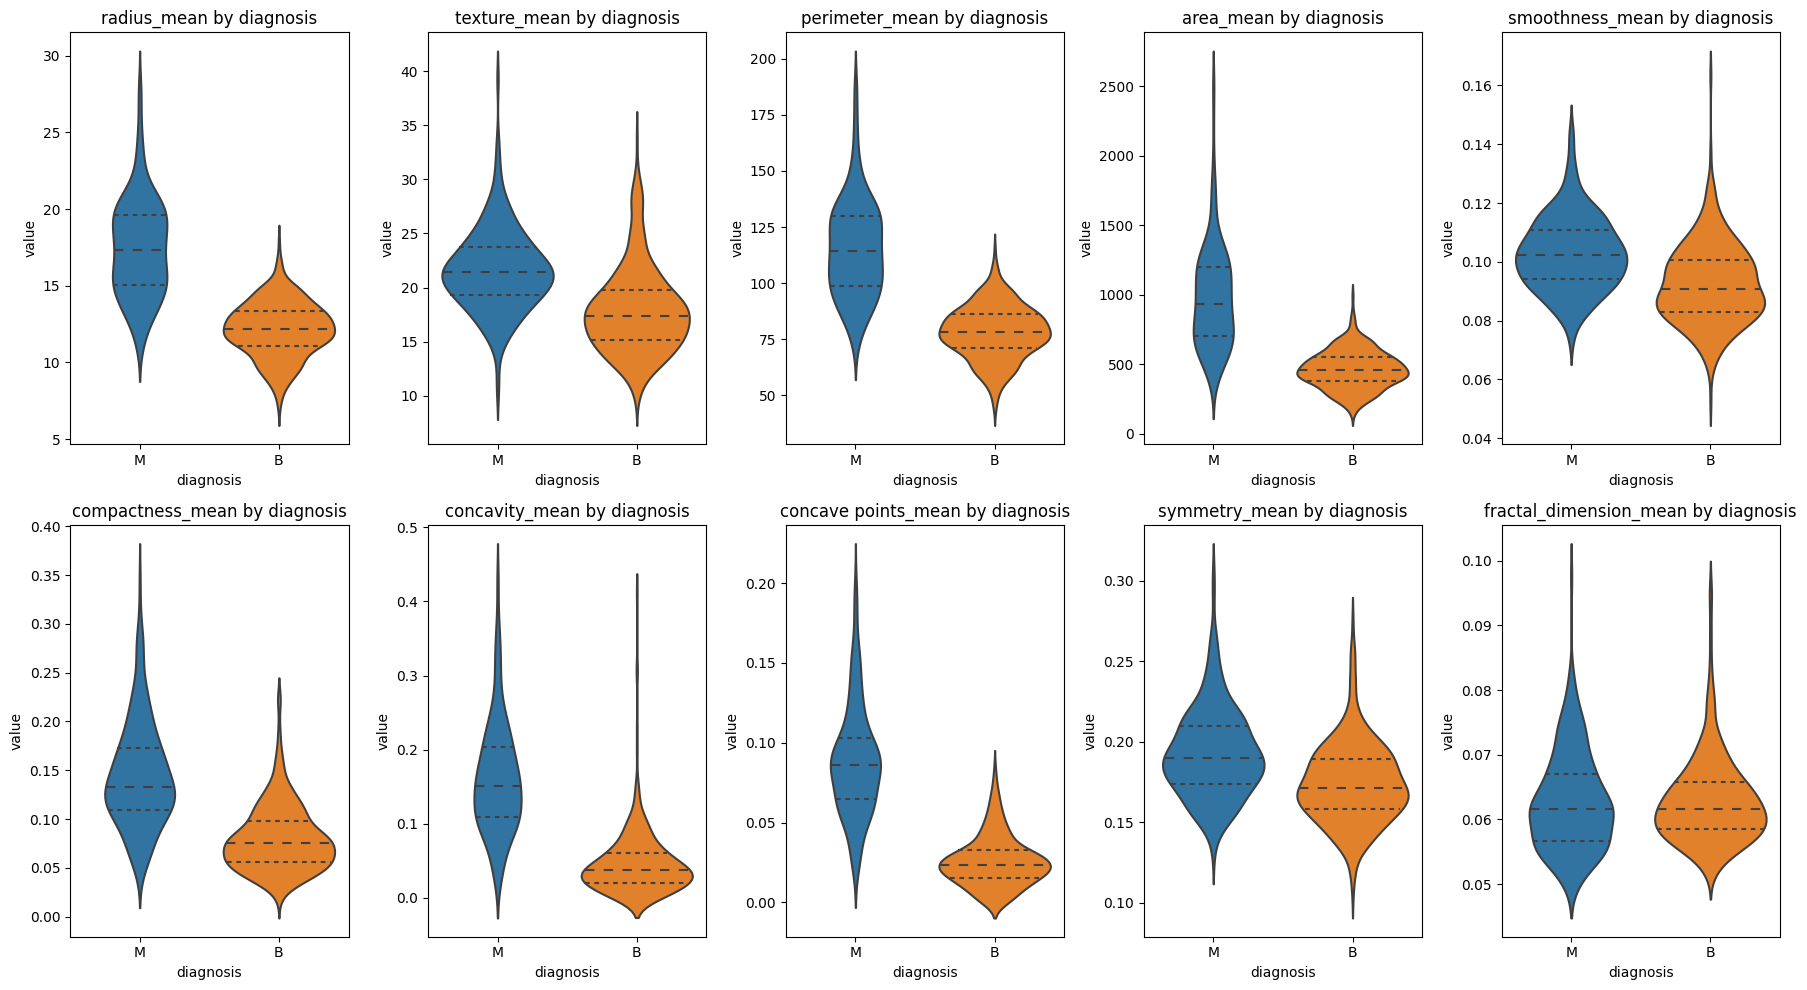

In [51]:
target_variable = 'diagnosis'
selected_columns = df.iloc[:, 1:11]  # Select the first 10 features (all the mean features)

# Melt the DataFrame to long format for creating a violin plot
melted_data = pd.melt(df, id_vars=target_variable, value_vars=selected_columns.columns)

# Create subplots for each feature
plt.figure(figsize=(18, 10))
for i, feature in enumerate(selected_columns.columns):
    plt.subplot(2, 5, i + 1)
    sns.violinplot(x=target_variable, y='value', data=melted_data[melted_data['variable'] == feature], inner='quart')
    plt.title(f'{feature} by {target_variable}')

plt.tight_layout()
plt.show()

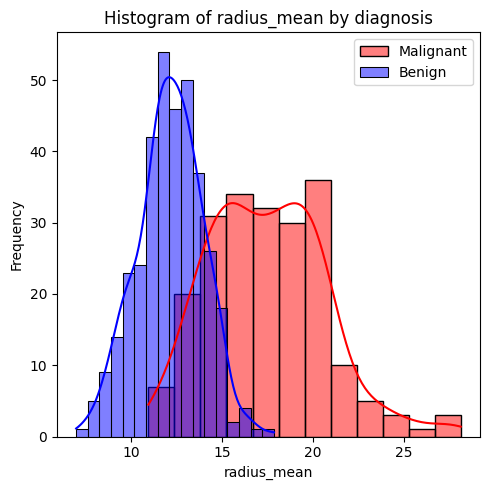

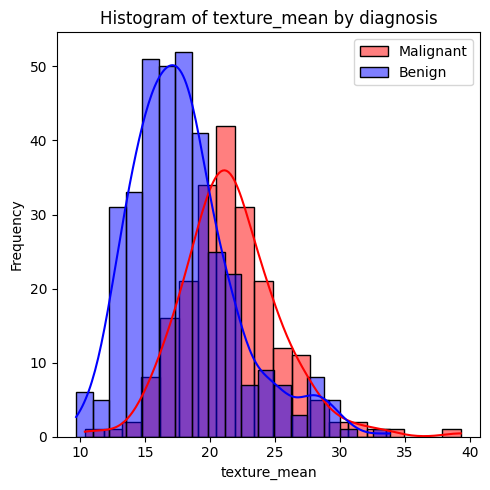

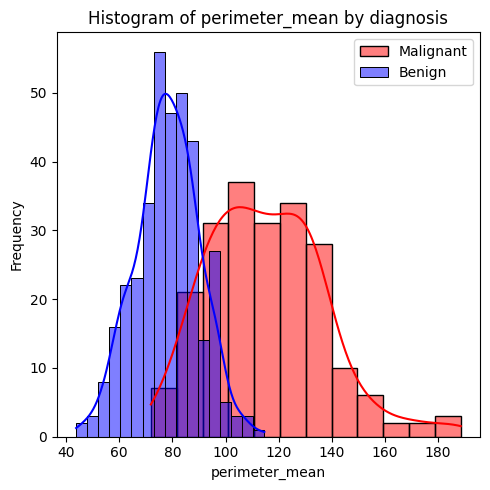

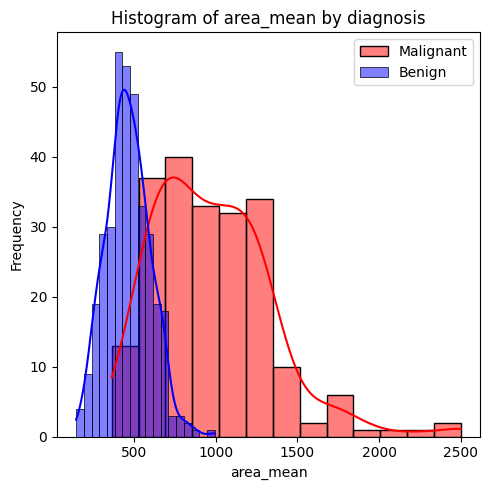

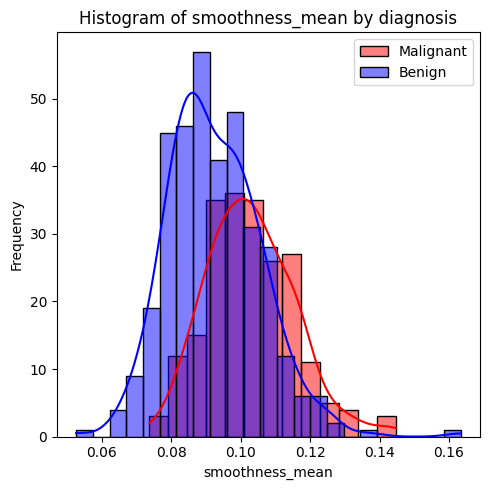

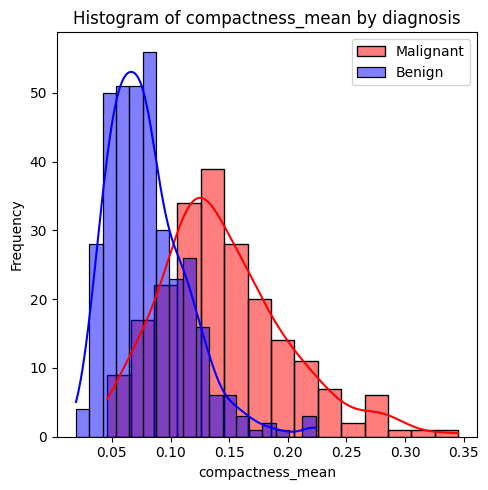

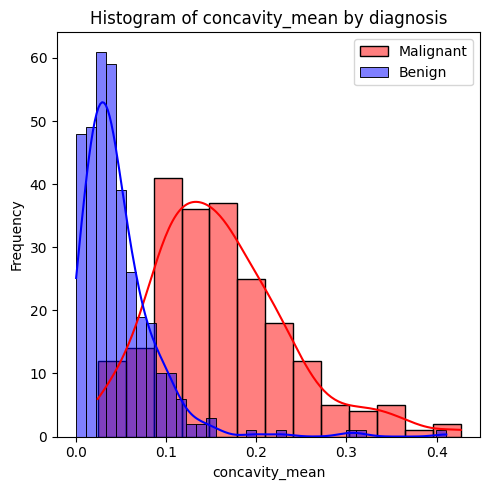

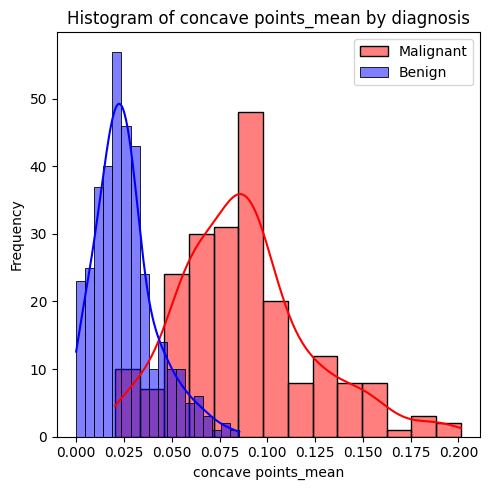

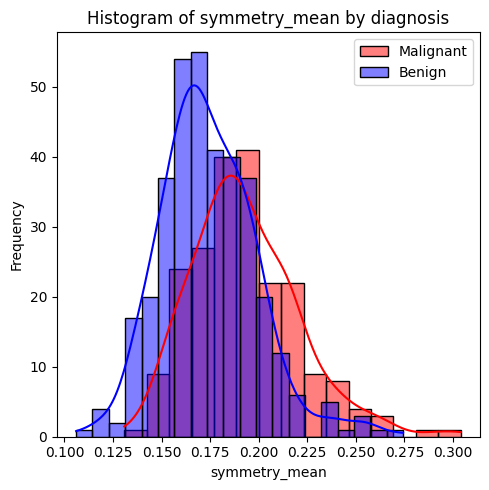

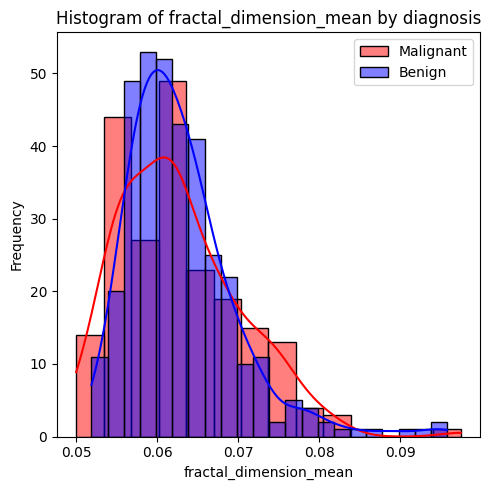

In [58]:
# Separate the dataset into two based on the target variable
malignant_data = df[df[target_variable] == 'M']
benign_data = df[df[target_variable] == 'B']

selected_features = X.iloc[:, :10]
# Loop through each feature and create histograms
for feature in selected_columns.columns:
    if feature != target_variable:
        plt.figure(figsize=(5, 5))
        
        # Plot histograms for malignant and benign data
        sns.histplot(malignant_data[feature], label='Malignant', color='red', alpha=0.5, kde=True)
        sns.histplot(benign_data[feature], label='Benign', color='blue', alpha=0.5, kde=True)
        
        plt.title(f'Histogram of {feature} by {target_variable}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

We can see above in the violin plot and the histograms, some features have better time classifying than some other ones. If we observe violin plots and histogram plots above, we can make the following conclusions:

- mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.

- mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. As they tend to overlap In any of the histograms there are no noticeable large outliers that warrants further cleanup.


## Creating a test set

In [60]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [61]:
traindf, test_df = train_test_split(df, test_size=0.3)

### Creating model skeleton

In [98]:
def model(model, data, features, target, k=10, verbose=False, random_state=None):

  # Extract features and target variable
  X = data[features]
  y = data[target]

  # Train the model on the full dataset
  model.fit(X, y)

  # Make predictions on the training set
  predictions = model.predict(X)

  # Print accuracy on the training set
  accuracy = metrics.accuracy_score(y, predictions)
  print(f"Accuracy on the training set: {accuracy*100:.2f}")

  # Initialize the KFold object
  kf = KFold(n_splits=k, shuffle=True, random_state=random_state)

  # Perform k-fold cross-validation
  for train_index, test_index in kf.split(X):

    # Filter training and test data
    X_train = X.iloc[train_index, :]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index, :]
    y_test = y.iloc[test_index]

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate the accuracy
    cv_accuracy = metrics.accuracy_score(y_test, y_pred)

    # Print the average cross-validation error
    print(f"Average cross-validation error: {cv_accuracy * 100 :.2f}%")

  # Train the model on the full dataset
  model.fit(X, y)

  return model


### Testing out different models

In [119]:
# making the datasets from the features we are going to consider
features = ['radius_mean','perimeter_mean','area_mean','compactness_mean', 'concave points_mean']
target ='diagnosis'

#### Logistic regression

In [120]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

model(LR, df, features, target)

Accuracy on the training set: 89.63
Average cross-validation error: 92.98%
Average cross-validation error: 89.47%
Average cross-validation error: 85.96%
Average cross-validation error: 92.98%
Average cross-validation error: 84.21%
Average cross-validation error: 85.96%
Average cross-validation error: 92.98%
Average cross-validation error: 92.98%
Average cross-validation error: 87.72%
Average cross-validation error: 94.64%


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

LogisticRegression()

### Decision Trees

In [121]:
DT = DecisionTreeClassifier()

model(DT, df, features, target)

Accuracy on the training set: 100.00
Average cross-validation error: 87.72%
Average cross-validation error: 87.72%
Average cross-validation error: 96.49%
Average cross-validation error: 92.98%
Average cross-validation error: 91.23%
Average cross-validation error: 89.47%
Average cross-validation error: 82.46%
Average cross-validation error: 87.72%
Average cross-validation error: 85.96%
Average cross-validation error: 89.29%


DecisionTreeClassifier()

#### Finding optimum depth

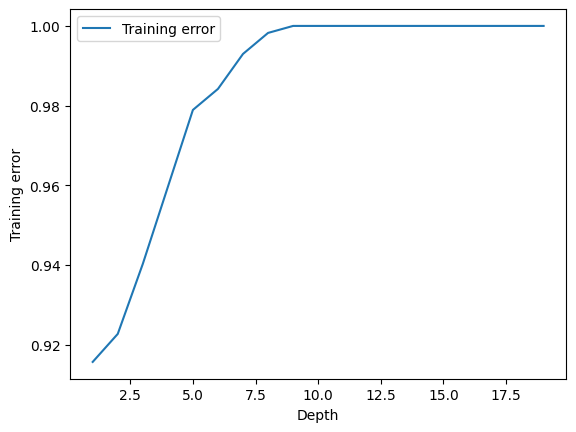

In [122]:
def elbow_graph(data, features, target):
    # Extract features and target variable
    X = data[features]
    y = data[target]

    # Create a list of depths to try
    depths = np.arange(1, 20)

    # Train a decision tree classifier for each depth and calculate the training error
    training_errors = []
    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X, y)

        # Calculate the training error
        training_error = clf.score(X, y)

        # Append the training error to the list
        training_errors.append(training_error)

    # Plot the training error against the depth
    plt.plot(depths, training_errors, label='Training error')
    plt.xlabel('Depth')
    plt.ylabel('Training error')
    plt.legend()
    plt.show()

elbow_graph(df, features, target)

We can see that the optimum depth for a Decision tree classifier is around at 10 depth. Will take less computational power.

### Random Forest Trees

In [123]:
RF = RandomForestClassifier()
model(RF, df, features, target)

Accuracy on the training set: 100.00
Average cross-validation error: 96.49%
Average cross-validation error: 89.47%
Average cross-validation error: 96.49%
Average cross-validation error: 92.98%
Average cross-validation error: 89.47%
Average cross-validation error: 91.23%
Average cross-validation error: 92.98%
Average cross-validation error: 94.74%
Average cross-validation error: 91.23%
Average cross-validation error: 92.86%


RandomForestClassifier()

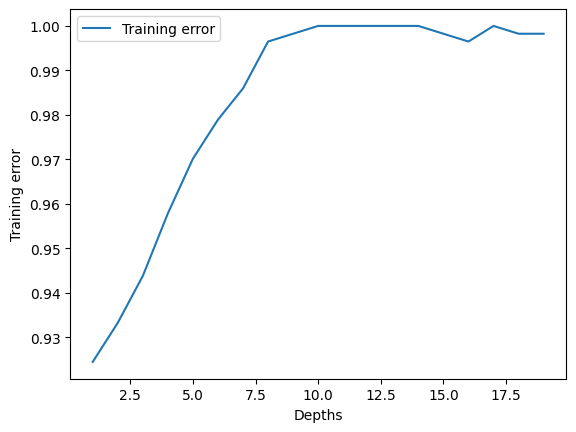

In [124]:
def elbow_graph(data, features, target):
    # Extract features and target variable
    X = data[features]
    y = data[target]

    # Create a list of depths to try
    depths = np.arange(1, 20)

    # Train a random forest classifier for each number of estimators and calculate the training error
    training_errors = []
    for depth in depths:
        clf = RandomForestClassifier(n_estimators=50, max_depth=depth)
        clf.fit(X, y)

        # Calculate the training error
        training_error = clf.score(X, y)

        # Append the training error to the list
        training_errors.append(training_error)

    # Plot the training error against the number of estimators
    plt.plot(depths, training_errors, label='Training error')
    plt.xlabel('Depths')
    plt.ylabel('Training error')
    plt.legend()
    plt.show()

elbow_graph(df, features, target)

Does best around a depth of 8.

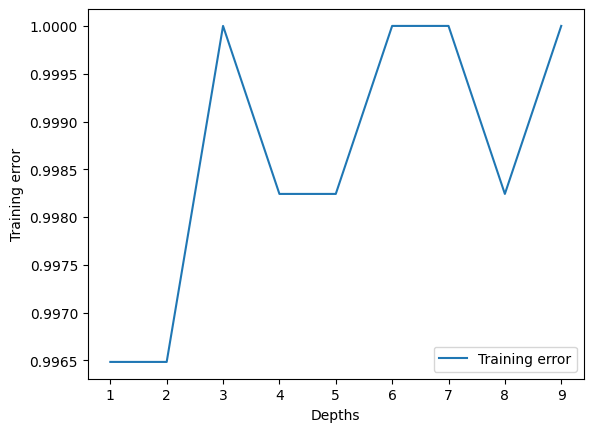

In [125]:
def elbow_graph(data, features, target):
    # Extract features and target variable
    X = data[features]
    y = data[target]

    # Create a list of depths to try
    features = np.arange(1, 10)

    # Train a random forest classifier for each number of estimators and calculate the training error
    training_errors = []
    for feature in features:
        clf = RandomForestClassifier(n_estimators=50, max_depth=8, max_features=feature)
        clf.fit(X, y)

        # Calculate the training error
        training_error = clf.score(X, y)

        # Append the training error to the list
        training_errors.append(training_error)

    # Plot the training error against the number of estimators
    plt.plot(features, training_errors, label='Training error')
    plt.xlabel('Depths')
    plt.ylabel('Training error')
    plt.legend()
    plt.show()

elbow_graph(df, features, target)

Best number of features to use is 4

We can see that the optimum depth for a Random Forest Classifier is around 50 estimators. Will take less computational power.

### Observations

The random forest classifier is the best performing model, with in general having the highest cross validation scores.

#### Model accuracy results for the best performing model

In [126]:
RF = RandomForestClassifier(n_estimators=50, max_depth=8, max_features=4)
model(RF, df, features, target)

Accuracy on the training set: 99.65
Average cross-validation error: 84.21%
Average cross-validation error: 96.49%
Average cross-validation error: 91.23%
Average cross-validation error: 92.98%
Average cross-validation error: 91.23%
Average cross-validation error: 91.23%
Average cross-validation error: 91.23%
Average cross-validation error: 91.23%
Average cross-validation error: 92.98%
Average cross-validation error: 92.86%


RandomForestClassifier(max_depth=8, max_features=4, n_estimators=50)

#### Model with a set of less 'optimum' hyperparameters

In [127]:
RF = RandomForestClassifier(n_estimators=20, max_depth=8, max_features=2)
model(RF, df, features, target)

Accuracy on the training set: 99.47
Average cross-validation error: 85.96%
Average cross-validation error: 98.25%
Average cross-validation error: 92.98%
Average cross-validation error: 94.74%
Average cross-validation error: 87.72%
Average cross-validation error: 82.46%
Average cross-validation error: 94.74%
Average cross-validation error: 94.74%
Average cross-validation error: 92.98%
Average cross-validation error: 92.86%


RandomForestClassifier(max_depth=8, max_features=2, n_estimators=20)

### Conclusions

The best model to be used for diagnosing breast cancer as found in this analysis is the Random Forest model with the top 5 predictors, 'concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean'. It gives a prediction accuracy of ~95% and a cross-validation score ~ 93% for the test data set.

I will see if I can improve this more by tweaking the model further and trying out other models in a later version of this analysis.